In [0]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import codecs
import warnings
warnings.filterwarnings('ignore')

In [35]:
#using google colab mounting drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import os
os.chdir("/content/drive/My Drive/google_colab/")
!ls

GoogleNews-vectors-negative300.bin.gz  kimyoon.png  Tweets.csv	wildml.png


In [37]:
tweet = pd.read_csv("/content/drive/My Drive/google_colab/Tweets.csv")
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [38]:
data = tweet[['text', 'airline_sentiment']] #only two column from data text and sentiment 
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [0]:
#data cleaning 

In [40]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

tweet_text = standardize_text(data, "text")

tweet_text.head()

,text,airline_sentiment
0,what said,neutral
1,plus you've added commercials to the experien...,positive
2,i didn't today must mean i need to take an...,neutral
3,"it's really aggressive to blast obnoxious ""en...",negative
4,and it's a really big bad thing about it,negative


In [0]:
# data processing

In [42]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

tweet_text["tokens"] = tweet_text["text"].apply(tokenizer.tokenize)
tweet_text.head()

,text,airline_sentiment,tokens
0,what said,neutral,"[what, said]"
1,plus you've added commercials to the experien...,positive,"[plus, you, ve, added, commercials, to, the, e..."
2,i didn't today must mean i need to take an...,neutral,"[i, didn, t, today, must, mean, i, need, to, t..."
3,"it's really aggressive to blast obnoxious ""en...",negative,"[it, s, really, aggressive, to, blast, obnoxio..."
4,and it's a really big bad thing about it,negative,"[and, it, s, a, really, big, bad, thing, about..."


In [43]:

#transforming postive to 2, netural to 1, negative to 0
sentiment = sorted(tweet_text['airline_sentiment'].unique())
print (sentiment)
sentiment_mapping = dict(zip(sentiment, range(0, len(sentiment) + 1)))
tweet_text['airline_sentiment']  = tweet_text['airline_sentiment'].map(sentiment_mapping).astype(int)
tweet_text.head()

['negative', 'neutral', 'positive']


,text,airline_sentiment,tokens
0,what said,1,"[what, said]"
1,plus you've added commercials to the experien...,2,"[plus, you, ve, added, commercials, to, the, e..."
2,i didn't today must mean i need to take an...,1,"[i, didn, t, today, must, mean, i, need, to, t..."
3,"it's really aggressive to blast obnoxious ""en...",0,"[it, s, really, aggressive, to, blast, obnoxio..."
4,and it's a really big bad thing about it,0,"[and, it, s, a, really, big, bad, thing, about..."


In [44]:
all_words = [word for tokens in tweet_text["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in tweet_text["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max & min sentence length is %s & %s" %(max(sentence_lengths), min(sentence_lengths)))


247352 words total, with a vocabulary size of 13088
Max & min sentence length is 34 & 1


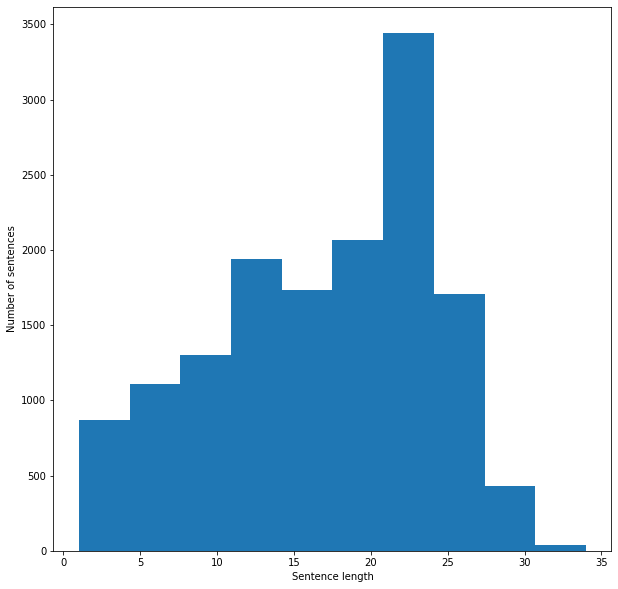

In [45]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [0]:
#machine Learningfrom sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import matplotlib
from sklearn.model_selection import train_test_split

In [0]:
#already tried naive bayes classifier here:  https://github.com/sunilpankaj/Twitter-US-Airline-Sentiment/blob/master/Cleaning%20data%20and%20prediction.ipynb

Embeddings
1. one hot encoder (bag of word)
2. tf-idf
3. word2vec

Model
1. Logistics regression 
2. CNN based classifier with best embedding (see sentimental analysis using deep learning.ipynb)



1. Bag of Words Counts

In [48]:
X = data['text']
y = data['airline_sentiment']
#splitting data into train and test sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print ("size of train data = ", X_train.shape,"size of test data = ", X_test.shape)
print ("size of target train data = ", y_train.shape, "size of target test data = ",y_test.shape)

vect = CountVectorizer()
#  fit and transform X_train into X_tr
X_train_counts =  vect.fit_transform(X_train)
# transform X_test into X_te
X_test_counts = vect.transform(X_test)
print ("After vectorizing size of x_train = ", X_train_counts.shape)
print ("After vectorizing size of x_test = ", X_test_counts.shape)

size of train data =  (10980,) size of test data =  (3660,)
size of target train data =  (10980,) size of target test data =  (3660,)
After vectorizing size of x_train =  (10980, 11233)
After vectorizing size of x_test =  (3660, 11233)


In [0]:
#size of vector is 10840 compare to old one ( https://github.com/sunilpankaj/Twitter-US-Airline-Sentiment/blob/master/Cleaning%20data%20and%20prediction.ipynb) which has 8360, here we did not remove stop words like , is, am, are etc. 

Let's visualize embeddings

In [0]:
# latent semantic analysis(lsa) using truncated svd which is similar to pca
#TruncatedSVD is very similar to PCA, but differs in that it works on sample matrices  directly instead of their covariance matrices. 
#https://scikit-learn.org/stable/modules/decomposition.html

In [0]:
def LSA(test_data, test_labels):
  lsa = TruncatedSVD(n_components=2)
  lsa.fit(test_data)
  lsa_scores = lsa.transform(test_data)
  color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
  color_column = [color_mapper[label] for label in test_labels] # [0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, ...]
  colors = ['orange','green','blue']
  #print (colors)
  plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
  orange_patch = mpatches.Patch(color='orange', label='negative')
  green_patch = mpatches.Patch(color='green', label='netural')
  blue_patch = mpatches.Patch(color='blue', label='positive')
  plt.legend(handles=[orange_patch, green_patch, blue_patch], prop={'size': 30})

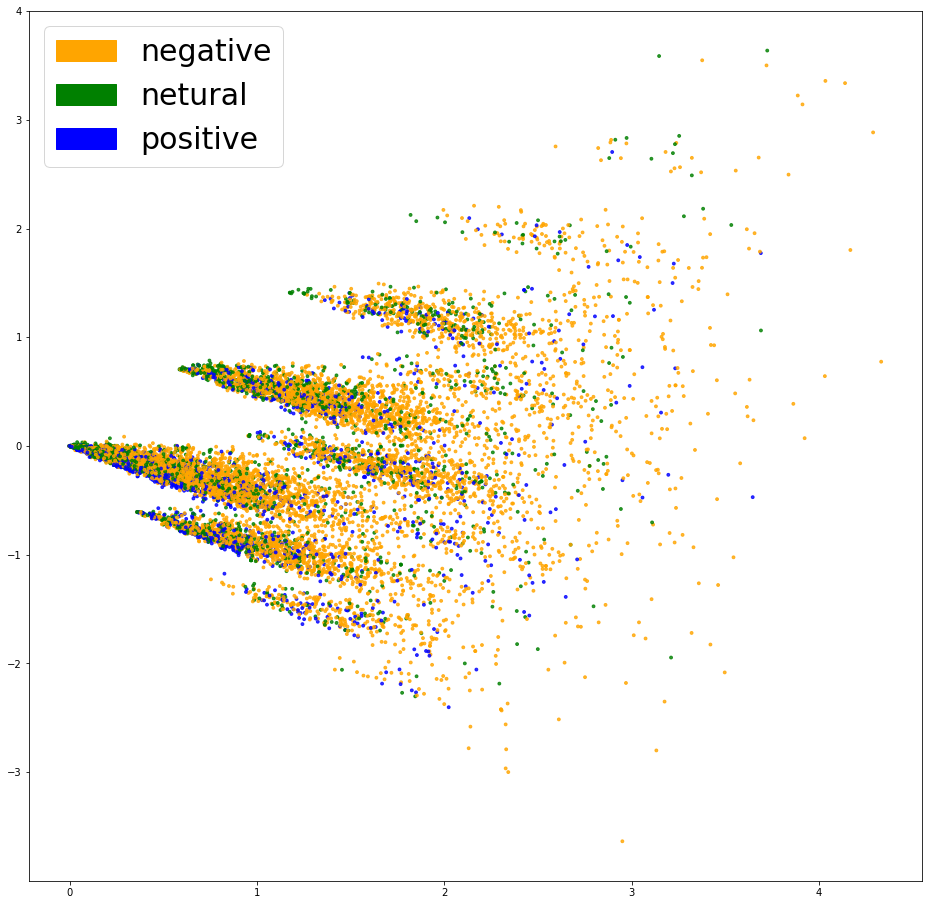

In [52]:
fig = plt.figure(figsize=(16, 16))          
LSA(X_train_counts, y_train)
plt.show()

In [0]:
# embeddings for 3 classes do not look seperable , but let try logistic regression on the bag og word.

In [0]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=20.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)
y_pred = clf.predict(X_test_counts)

In [55]:
# print the confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
metrics.confusion_matrix(y_test, y_pred)

array([[1881,  286,  124],
       [ 202,  476,   96],
       [  85,   95,  415]])

In [0]:
def get_metrics(y_test, y_predicted):
  precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')
  recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
  f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
  accuracy = accuracy_score(y_test, y_predicted)
  print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

In [57]:
get_metrics(y_test, y_pred)

accuracy = 0.757, precision = 0.767, recall = 0.757, f1 = 0.761


In [0]:
#naive bayes and logistic regression gives same accuracy


2. TF-IDF

    s1: "this flight is worst"

    tf : how many time words "flight" came in a given sentence /total number of words in a sentence = 1/5

    idf: log (how many sentences have flight word / total number of sentences)

    tfidf discounting words that are too frequent.

In [0]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf= tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

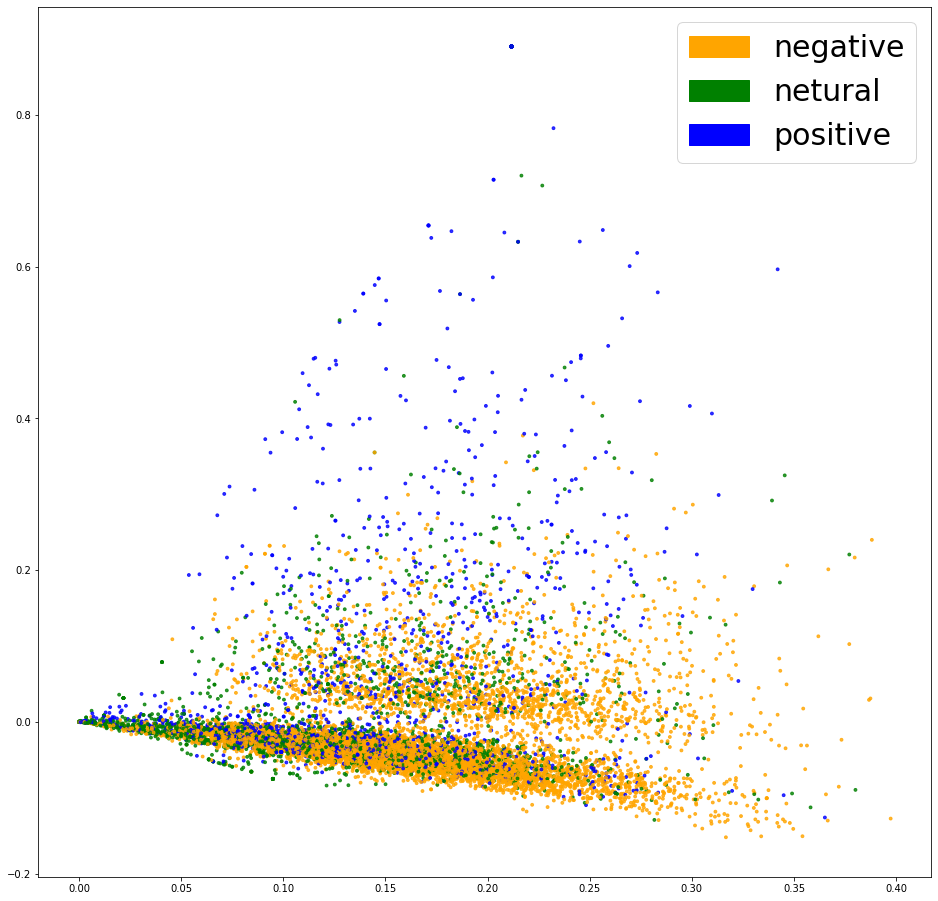

In [59]:
fig = plt.figure(figsize=(16, 16))          
LSA(X_train_tfidf, y_train)
plt.show()

In [0]:
#tfidf looks better than one hot encoder embeddings , tfidf will be little easier to classify.

In [0]:
clf = LogisticRegression(C=20.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

In [62]:
get_metrics(y_test, y_pred)
metrics.confusion_matrix(y_test, y_pred)

accuracy = 0.773, precision = 0.778, recall = 0.773, f1 = 0.775


array([[1935,  258,   98],
       [ 201,  477,   96],
       [  82,   97,  416]])

In [0]:
#tf-idf embeddings improved results of logistics regression, we can try other ml model also but first let's explore all different type of embeddings.

one hot encode and tfidf training vector do not contain all relavent words informantion , we need to capture semantic meaning of words.let's say we don't have word "late" in training features but we have "delayed", so while in testing "late" will be totaly different meaning in sentance by one hot encode or tf-idf. 
e.g. "flight delayed by 30 minutes" , "flight late by 30 mintues"
here need to capture that late and delayed have same meaning.

3. Word2vec

Word2vec is a model that was pre-trained on a very large corpus, and provides embeddings that map words that are similar close to each other.

In [0]:
import gensim

In [0]:
word2vec_path = "/content/drive/My Drive/google_colab/GoogleNews-vectors-negative300.bin.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [0]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
  if len(tokens_list)<1:
    return np.zeros(k)
  if generate_missing:
    vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
  else:
    vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
  length = len(vectorized)
  summed = np.sum(vectorized, axis=0)
  averaged = np.divide(summed, length)
  return averaged

def get_word2vec_embeddings(vectors, data, generate_missing=False):
  embeddings = data['tokens'].apply(lambda x: get_average_word2vec(x, vectors,generate_missing=generate_missing))
  return list(embeddings)

In [0]:
embeddings = get_word2vec_embeddings(word2vec, data)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, y, 
                                                                                        test_size=0.2, random_state=40)

In [68]:
len(X_train_word2vec), len(X_test_word2vec), len(y_train_word2vec), len(y_test_word2vec)

(11712, 2928, 11712, 2928)

In [69]:
X_train_word2vec[0].shape 
embeddings[0].shape

(300,)

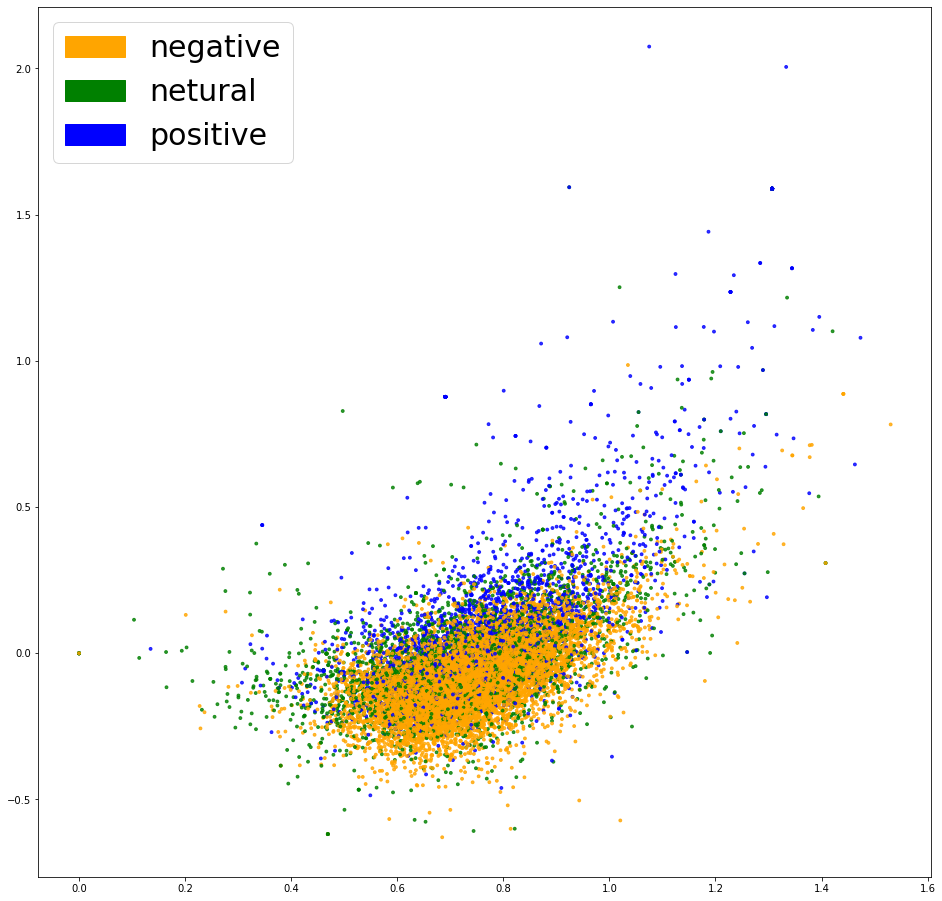

In [70]:
fig = plt.figure(figsize=(16, 16))          
LSA(embeddings, y)
plt.show()

In [0]:
clf_w2v = LogisticRegression(C=20.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [72]:
get_metrics(y_test_word2vec, y_predicted_word2vec)
metrics.confusion_matrix(y_test_word2vec, y_predicted_word2vec)

accuracy = 0.752, precision = 0.784, recall = 0.752, f1 = 0.761


array([[1431,  311,  120],
       [ 115,  434,   75],
       [  40,   65,  337]])

In [0]:
#acurracy is not improving, maybe model is not good enough to handle complex pattern. now let's try other method

CNNs for text classification

In [0]:
import numpy as np
import pandas as pd 
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout,concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler

# yoon kim  https://arxiv.org/pdf/1408.5882.pdf  

http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/

![pictures](https://drive.google.com/uc?id=1AhlfdCxnM13vL8vtqLx_3UhLoG4fIsbR)

![pictures](https://drive.google.com/uc?id=1bPoG6jR8Nn7qPurOqEqYd3r_OOSWwl0V)

# Create embeddings 

In [75]:
EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 34
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT=.2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(data["text"].tolist())
sequences = tokenizer.texts_to_sequences(data["text"].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(y))

indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]

embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

Found 13346 unique tokens.
(13347, 300)


In [87]:
def ConvNet(embedding_layer,max_sequence_length,labels_index):
  sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
  input_embedded_sequences = embedding_layer(sequence_input)
  conv1 = Conv1D(filters=128, kernel_size=3, activation='relu')(input_embedded_sequences)
  #pool1 = MaxPooling1D(pool_size=3)(conv1)
  conv2 = Conv1D(filters=128, kernel_size=3, activation='relu')(input_embedded_sequences)
  #pool2 = MaxPooling1D(pool_size=3)(conv2)

  #concat_conv1_2 = concatenate([pool1, pool2,],axis=1)
  concat_conv1_2 = concatenate([conv1, conv2,],axis=1)
  
  conv3 = Conv1D(filters=128, kernel_size=4,activation='relu')(input_embedded_sequences)
  #pool3 = MaxPooling1D(pool_size=3)(conv3)
  conv4 = Conv1D(filters=128, kernel_size=4,activation='relu')(input_embedded_sequences)
  #pool4 = MaxPooling1D(pool_size=3)(conv4)
  #concat_conv3_4 = concatenate([pool3, pool4],axis=1)
  concat_conv3_4 = concatenate([conv3, conv4],axis=1)
  
  conv5 = Conv1D(filters=128, kernel_size=5, activation='relu')(input_embedded_sequences)
  #pool5 = MaxPooling1D(pool_size=3)(conv5)
  conv6 = Conv1D(filters=128, kernel_size=5, activation='relu')(input_embedded_sequences)
  #pool6 = MaxPooling1D(pool_size=3)(conv6)

  #concat_conv5_6 = concatenate([pool5, pool6],axis=1)
  concat_conv5_6 = concatenate([conv5, conv6],axis=1)
   
  concat_all = concatenate([concat_conv1_2, concat_conv3_4,concat_conv5_6, axis=1])

  x = Dropout(0.5)(concat_all)
  x = Flatten()(x)
  x = Dropout(0.5)(x)
  x = Dense(128, activation='relu')(x)
  preds = Dense(labels_index, activation='softmax')(x)

  model = Model(sequence_input, preds)
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['acc'])
  model.summary()
  return model

SyntaxError: ignored

In [88]:
num_words = len(word_index)+1
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_weights],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)


train_sample = int(0.7 * cnn_data.shape[0])
val_samples = int(0.15 * cnn_data.shape[0])
test_samples = int(0.15 * cnn_data.shape[0])

x_train = cnn_data[:train_sample]
y_train = labels[:train_sample]
x_val = cnn_data[train_sample:train_sample+val_samples]
y_val = labels[train_sample:train_sample+val_samples]
x_test = cnn_data[-test_samples:]
y_test = labels[-test_samples:]
print (x_train.shape, x_val.shape, x_test.shape, y_val.shape,y_train.shape)

model = ConvNet(embedding_layer,MAX_SEQUENCE_LENGTH,len(list(y.unique())))

(10248, 34) (2196, 34) (2196, 34) (2196, 3) (10248, 3)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 34, 300)      4004100     input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_20 (Conv1D)              (None, 31, 128)      153728      embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_21 (Conv1D)              (None, 31, 128)      153728      embedding_3[0][0]                
_____________________________________

In [89]:
#model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=128)
callback = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True,mode="min")
# This callback will stop the training when there is no improvement in
# the validation loss for 5 consecutive epochs.
model.fit(x_train, y_train, epochs=50, callbacks=[callback],validation_data=(x_val, y_val))

Epoch 1/50
321/321 [==============================] - 3s 9ms/step - loss: 0.7964 - acc: 0.6651 - val_loss: 0.6388 - val_acc: 0.7377
Epoch 2/50
321/321 [==============================] - 3s 8ms/step - loss: 0.6302 - acc: 0.7382 - val_loss: 0.5753 - val_acc: 0.7641
Epoch 3/50
321/321 [==============================] - 3s 8ms/step - loss: 0.5660 - acc: 0.7704 - val_loss: 0.5525 - val_acc: 0.7760
Epoch 4/50
321/321 [==============================] - 3s 8ms/step - loss: 0.5200 - acc: 0.7874 - val_loss: 0.5394 - val_acc: 0.7837
Epoch 5/50
321/321 [==============================] - 3s 9ms/step - loss: 0.4865 - acc: 0.8039 - val_loss: 0.5393 - val_acc: 0.7955
Epoch 6/50
321/321 [==============================] - 3s 8ms/step - loss: 0.4482 - acc: 0.8165 - val_loss: 0.5335 - val_acc: 0.7914
Epoch 7/50
321/321 [==============================] - 3s 8ms/step - loss: 0.4160 - acc: 0.8320 - val_loss: 0.5321 - val_acc: 0.7919
Epoch 8/50
321/321 [==============================] - 3s 8ms/step - loss: 0.

In [90]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(x_val, y_val, batch_size=128)
print('test loss, test acc:', results)


# Evaluate on test data
18/18 [==============================] - 0s 7ms/step - loss: 0.5321 - acc: 0.7919
test loss, test acc: [0.532052755355835, 0.7918943762779236]


In [91]:
y_prediction = model.predict(x_test)
y_prediction

array([[9.1434383e-01, 5.8819346e-02, 2.6836818e-02],
       [8.0694818e-01, 1.9146153e-01, 1.5903213e-03],
       [5.0816542e-01, 3.3293557e-01, 1.5889902e-01],
       ...,
       [9.9752194e-01, 2.2582449e-03, 2.1971772e-04],
       [9.6654373e-01, 2.2416528e-02, 1.1039813e-02],
       [9.3980426e-01, 2.9753096e-02, 3.0442774e-02]], dtype=float32)